## difference Image

[Python, OpenCV, NumPyで画像を比較（完全一致か判定、差分取得など）](https://note.nkmk.me/python-opencv-numpy-image-difference/)

[opencv公式ドキュメント](http://opencv.jp/opencv-2svn/cpp/index.html)


In [1]:
from pathlib import Path 
import time

import numpy as np
import cv2
import matplotlib.pyplot as plt


%matplotlib inline

# from pylab import rcParams
# rcParams['figure.figsize'] = 30,10

In [2]:
class DiffImage():
    """
    差分画像解析
    
    """
    
    @staticmethod
    def three_image_show(image1, image2, image3 ):
        
        plt.figure(figsize=(20,20),dpi=200) # figsize
        
        plt.subplot(131)
        plt.imshow(image1,cmap='gray')
        plt.title('before'), plt.xticks([]), plt.yticks([])
        plt.subplot(132)
        plt.imshow(image2,cmap='gray')
        plt.title('after'), plt.xticks([]), plt.yticks([])
        plt.subplot(133)
        plt.imshow(image3,cmap='gray')
        plt.title('sub image'), plt.xticks([]), plt.yticks([])
        plt.show()
    
        
    @staticmethod 
    def diff_image(image1,image2,bit=8,opt_dir=None,enhance='linear'):
        """
        Make difference image
        image2-image1 
        
        image1,2: file name is string. example:'image4.tif'
        bit: 8bit->8, 16bit -> 16
        opt_dir: file path ,string,  example:'C:/user/'

        """
        if opt_dir != None:
            p_dir= Path(opt_dir)
            p_dir_img1= p_dir/image1
            p_dir_img2= p_dir/image2
        else:
            p_dir_img1=Path(image1)
            p_dir_img2=Path(image2)
            
            
        if bit==8:    
            img1=cv2.imread(str(p_dir_img1),0)
    #         print(img1.shape,img1.dtype)
            img2=cv2.imread(str(p_dir_img2),0)
        #     print(img2.shape,img2.dtype)
        else:
            #16bit 
            img1=cv2.imread(str(p_dir_img1),-1)
    #         print(img1.shape,img1.dtype)
            img2=cv2.imread(str(p_dir_img2),-1)
        #     print(img2.shape,img2.dtype)
            

        if img1.shape == img2.shape:
            ###画像が同じ形状、幅・高さが同じか判定
            # print(np.array_equal(img1, img2))
            """
            差分の絶対値は同じ形状のndarrayは-演算子で差分を算出できる。
            cv2.imread()で読み込んだndarrayのデータ型は符号なし整数8ビットunit8
            そのままだとマイナスの値を扱えない。astype()で符号ありのintに変換する。
            """
            im_diff = img2.astype(int)-img1.astype(int)
#             print(im_diff.dtype)
#             print(img2.astype(int).dtype)
            ## 差分を画像として保存したい場合はnp.abs()で絶対値をとる。
            im_diff_abs = np.abs(im_diff)

            diff_file_name='diff_{}_{}.png'.format(image1.split('.')[0],image2.split('.')[0])
            
            # save the substraction data 
            cv2.imwrite(diff_file_name, im_diff_abs)
            
            if enhance == 'linear':
                #最大値で規格化して差分を強調する
                im_diff_abs_norm = DiffImage.enhance_image(im_diff_abs)
                
            else:
                #log
                #最大値で規格化してLogを取り差分を強調する
                im_diff_abs_norm = DiffImage.enhance_image_log(im_diff_abs)

            diff_nor_file_name='diff_nor_{}_{}.png'.format(image1.split('.')[0],image2.split('.')[0])
    
            # save the substraction data 
            cv2.imwrite(diff_nor_file_name, im_diff_abs_norm)
            
           # DiffImage.three_image_show(img1, img2, im_diff_abs)
        
            DiffImage.three_image_show(img1, img2, im_diff_abs_norm)
            
        else:
            print('The shape of the image is not the same. ')

    @staticmethod
    def enhance_image(img0):
        """
        最大値で規格化して差分を強調する
        img0: ndarray

        """
        im_abs = np.abs(img0)
        image_bit=img0.dtype
    
        if image_bit==np.uint8:
            max=255
                
        elif image_bit == np.uint16:
            max=65535
                
        else:
            max=255
            
#         print(max)
            
        if im_abs.max() == 0 :
            #0で割るとエラーになるので
            im_abs_norm = (im_abs / 1) * max
            
        else:
            im_abs_norm = (im_abs / im_abs.max()) * max          
        
        return im_abs_norm
    
    @staticmethod
    def enhance_image_log(img0):
        """
        最大値で規格化してLogを取って差分を強調する
        img0: ndarray

        """
        im_abs = np.abs(img0)
        image_bit=img0.dtype
    
        if image_bit==np.uint8:
            max=255
                
        elif image_bit == np.uint16:
            max=65535
                
        else:
            max=255
            
#         print(max)
            
        if im_abs.max() == 0 :
            #0で割るとエラーになるので
            im_abs_norm = np.log(im_abs / 1) 
            
        else:
            im_abs_norm = np.log(im_abs / im_abs.max())       
        
        return im_abs_norm

        
    @staticmethod  
    def diff_image_opencv(image1,image2,bit=8,opt_dir=None):
        """
        OpenCVにある関数を利用
        参考差分関数：
         cv2.absdiff(ndarray1, ndarray2)
        image2-image1 


        """
        if opt_dir != None:
            p_dir= Path(opt_dir)
            p_dir_img1= p_dir/image1
            p_dir_img2= p_dir/image2
        else:
            p_dir_img1=Path(image1)
            p_dir_img2=Path(image2)
            
            
        if bit==8:    
            img1=cv2.imread(str(p_dir_img1),0)
    #         print(img1.shape,img1.dtype)
            img2=cv2.imread(str(p_dir_img2),0)
        #     print(img2.shape,img2.dtype)
        else:
            img1=cv2.imread(str(p_dir_img1),-1)
    #         print(img1.shape,img1.dtype)
            img2=cv2.imread(str(p_dir_img2),-1)
        #     print(img2.shape,img2.dtype)
            

        if img1.shape == img2.shape:
            ###画像が同じ形状、幅・高さが同じか判定
            # print(np.array_equal(img1, img2))
            
            #参考差分関数：
            im_diff_abs = cv2.absdiff(img1, img2)

            diff_file_name='diff_'+image1.split('.')[0] + '_' +image2.split('.')[0] +'.png'
            cv2.imwrite(diff_file_name, im_diff_abs)

             #差分が小さくて画像で確認しにくいときは最大値で規格化する
            im_diff_abs_norm = DiffImage.enhance_image(im_diff_abs)

            diff_nor_file_name='diff_nor_'+image1.split('.')[0] + '_' +image2.split('.')[0] +'.png'
    
            # save the substraction data 
            cv2.imwrite(diff_nor_file_name, im_diff_abs_norm)
            
           # DiffImage.three_image_show(img1, img2, im_diff_abs)
        
            DiffImage.three_image_show(img1, img2, im_diff_abs_norm)

           
    @staticmethod
    def image_hist(image0,opt_dir=None):
        """
        8bitのみ
        example: DiffImage.image_hist("109.bmp")

        """
        
        if opt_dir != None:
            p_dir= Path(opt_dir)
            p_dir_img1= p_dir/image0

        else:
            p_dir_img1=Path(image0)

        img1=cv2.imread(str(p_dir_img1),0)
#         print(img1.shape,img1.dtype)
        hist, bins = np.histogram(img1.flatten(), bins=256)
        plt.figure(figsize=(20,10))
        plt.plot(hist, marker='o')
        plt.grid(True)
        plt.xlabel('pixel value', fontsize = 20)
        plt.ylabel('number of pixels', fontsize = 20)
        plt.xlim(0, 255)  # 0〜255までplot
        plt.title('Histgram, {}'.format(image0), fontsize = 20)
        

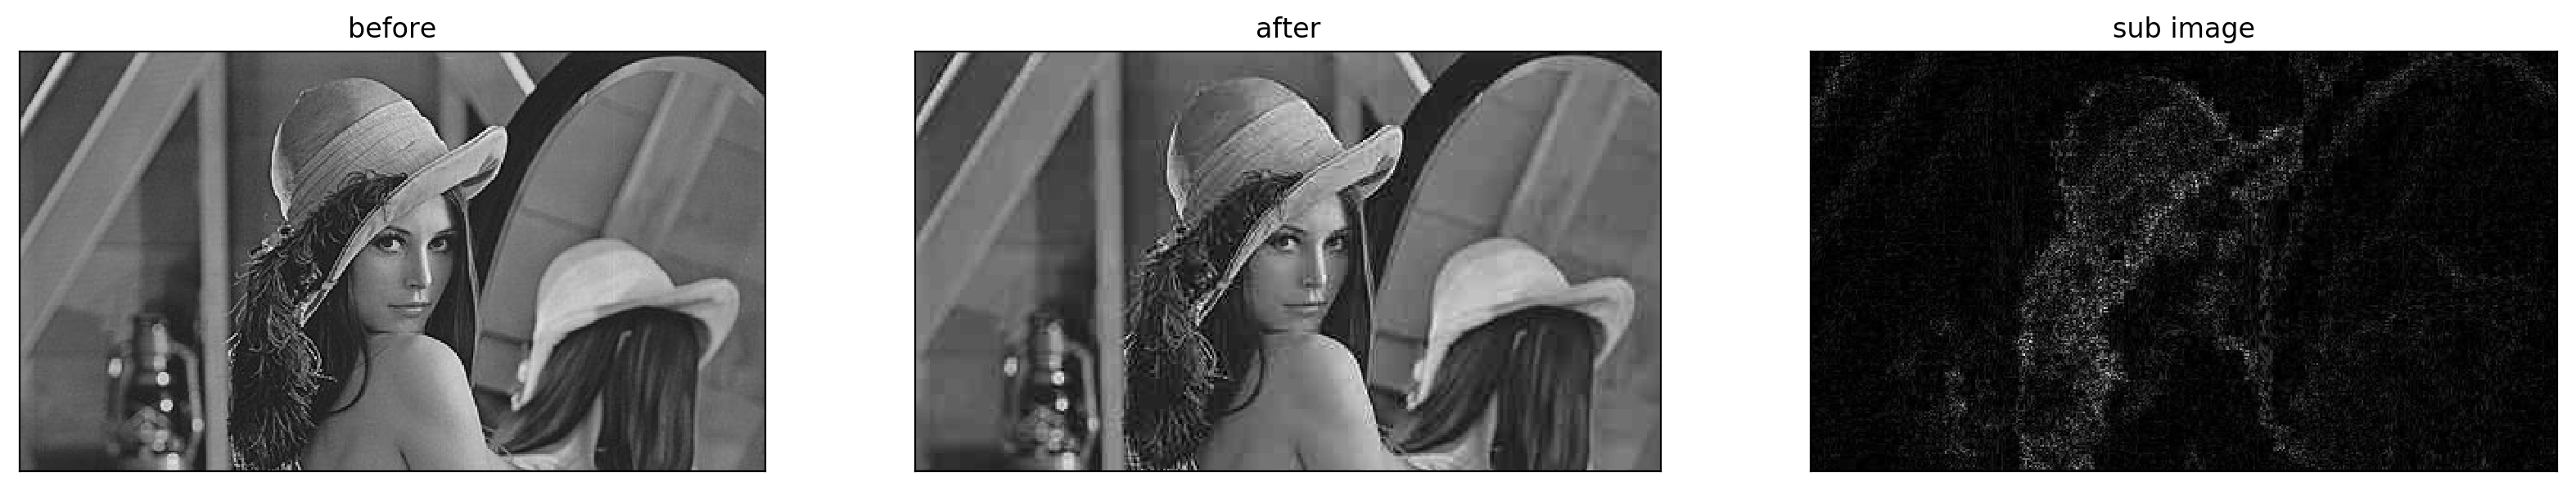

In [3]:
#lena_lowは解像度を落としたデータ
DiffImage.diff_image('lena.jpg','lena_low.jpg')

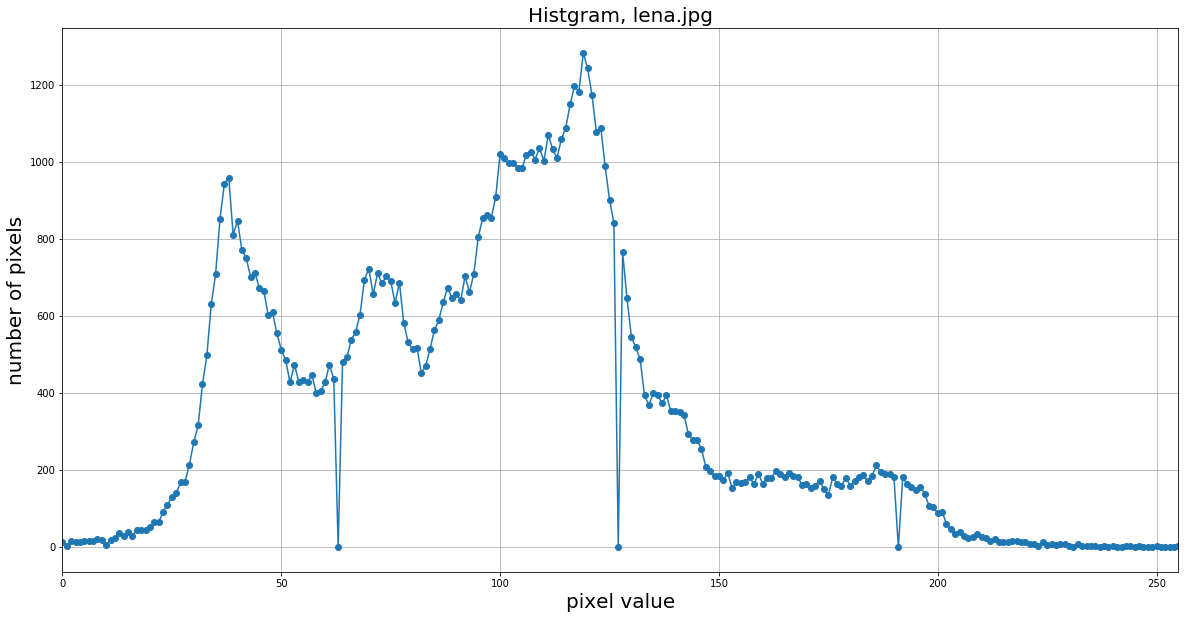

In [4]:
DiffImage.image_hist('lena.jpg')

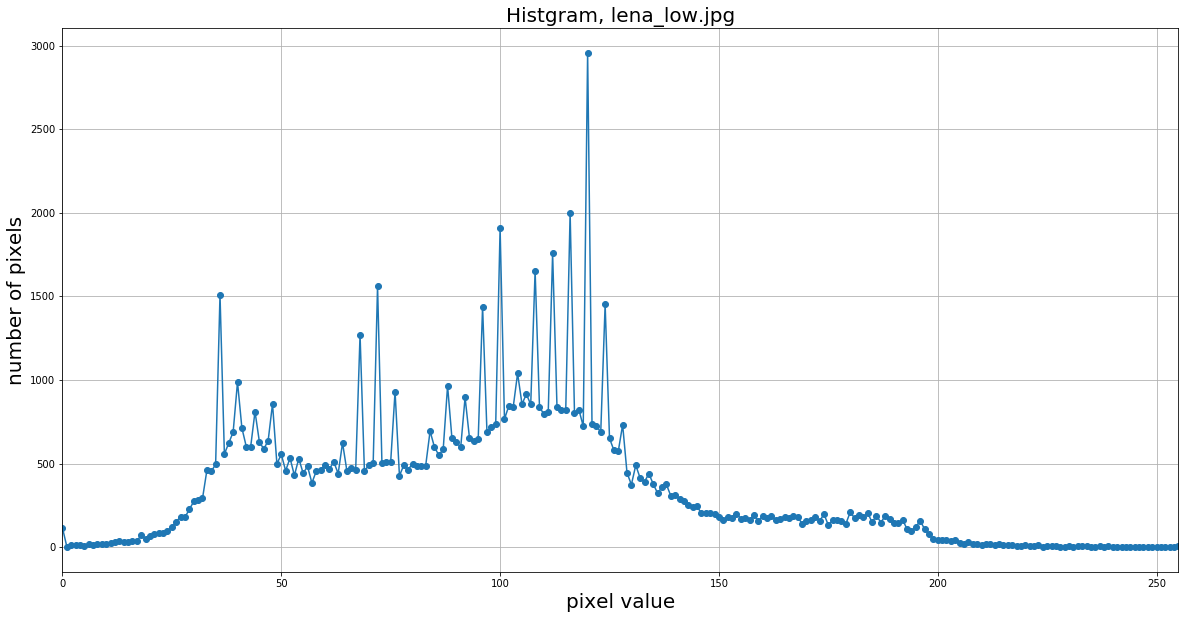

In [5]:
DiffImage.image_hist('lena_low.jpg')

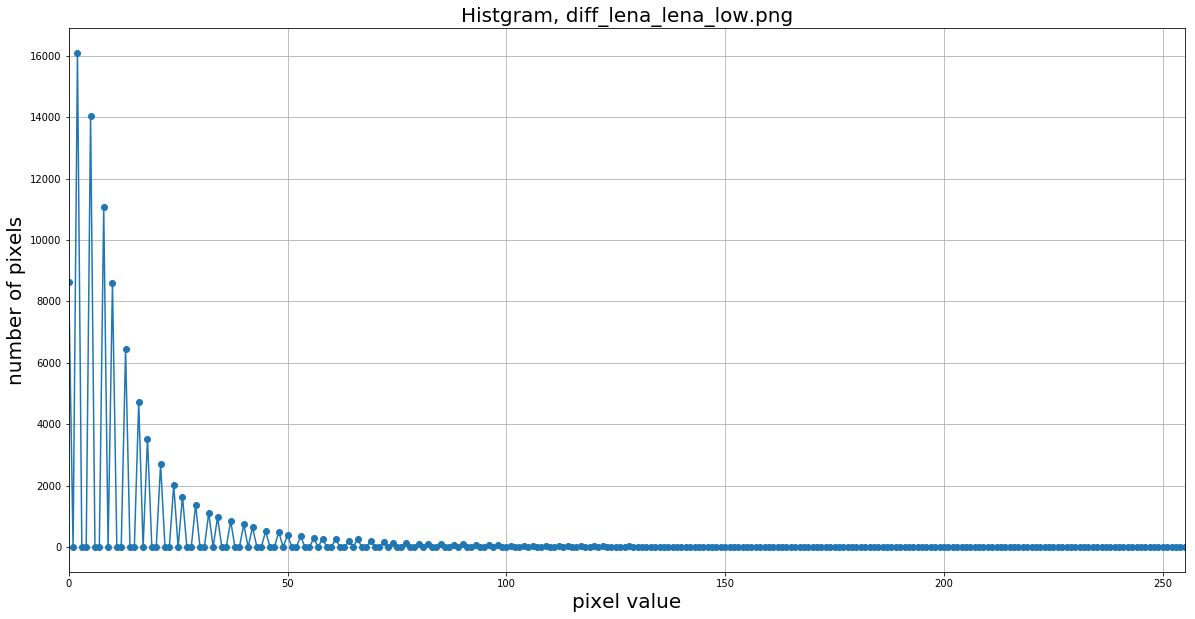

In [6]:
DiffImage.image_hist('diff_lena_lena_low.png')